## Problem: Data Loading; Preparation; Summarising

Isolation Forest is a common unsupervised machine learning method that can isolate anomalous data points from data. 
The algorithm can be scaled up to handle large and highly dimensional datasets if required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import IsolationForest

from IPython.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))
%matplotlib inline

In [2]:
path = './Technical Assessment - Data Science/JET_CSV_DATA/'

perfix = '' 
file_name =  '' 

os.chdir(path)

In [3]:
# list files in Task data folder

with os.scandir() as bag:
    for obj in bag:
        if obj.is_file():
            print(obj.name)

JET_DATA_0.csv
JET_DATA_1.csv
JET_DATA_10.csv
JET_DATA_2.csv
JET_DATA_3.csv
JET_DATA_4.csv
JET_DATA_5.csv
JET_DATA_6.csv
JET_DATA_7.csv
JET_DATA_8.csv
JET_DATA_9.csv


## Read Dataset
Given large file size, I try to open one only.

In [4]:
df_0 = pd.read_csv('JET_DATA_1.csv')

df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   DTT_ID         1048575 non-null  int64  
 1   GL account     1048575 non-null  object 
 2   Business Unit  1048575 non-null  object 
 3   Journal        1048575 non-null  object 
 4   VERS           1048575 non-null  object 
 5   LDG_NAME       1048575 non-null  object 
 6   Account No     1048575 non-null  object 
 7   Period         1048575 non-null  object 
 8   Sequence No    1048575 non-null  int64  
 9   Post Date      1048575 non-null  object 
 10  PTIMEI         1048575 non-null  int64  
 11  JNL_LNE        1048575 non-null  int64  
 12  DOC_TYPE       1048575 non-null  object 
 13  Doc Date       1048575 non-null  object 
 14  DOC_REF1       1048575 non-null  object 
 15  SOURCE         1045106 non-null  object 
 16  Amount         1048575 non-null  float64
 17  NARR1   

## Select columns named in Data Dictionary

In [5]:
df_0 = df_0[['GL account', 'Journal', 'Account No', 'BAT_NAME', 'JNL_LNE', 
             'Period', 'SOURCE_USER', 'POST_USER', 'Amount']].copy()

In [6]:
df_0.head()

,GL account,Journal,Account No,BAT_NAME,JNL_LNE,Period,SOURCE_USER,POST_USER,Amount
0,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,4,Period 4,SOURCE_USER 61,POST_USER 60,0.480060
1,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,5,Period 4,SOURCE_USER 61,POST_USER 60,0.788670
2,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,6,Period 4,SOURCE_USER 61,POST_USER 60,1.080135
3,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,7,Period 4,SOURCE_USER 61,POST_USER 60,1.097280
4,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,8,Period 4,SOURCE_USER 61,POST_USER 60,-1.097280


In [7]:
df_0.describe()

,JNL_LNE,Amount
count,1.048575e+06,1.048575e+06
mean,2.338562e+06,9.107589e-02
std,1.450398e+07,8.790742e+03
min,1.000000e+00,-5.521651e+06
25%,2.100000e+01,-3.611080e-01
50%,2.600000e+02,4.402837e-02
75%,1.190000e+03,4.944618e-01
max,9.500000e+07,5.521651e+06


In [8]:
# Remove NaN values
df_0.dropna(inplace=True)

## Model for Outlier Detection
Since data has no label and considering short deadline, I need to unsupervised method. Isolation Forest is my unsupervised method that can detect outliers from dataset.

In [9]:
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.01), max_features=1.0, n_jobs=10) #
model.fit(df_0[['Amount']])

/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, n_estimators=150, n_jobs=10)

In [10]:
df_0['anomaly_scores']=model.decision_function(df_0[['Amount']])
df_0['anomaly']=model.predict(df_0[['Amount']])
df_0.head(20)

,GL account,Journal,Account No,BAT_NAME,JNL_LNE,Period,SOURCE_USER,POST_USER,Amount,anomaly_scores,anomaly
0,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,4,Period 4,SOURCE_USER 61,POST_USER 60,0.480060,0.445153,1
1,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,5,Period 4,SOURCE_USER 61,POST_USER 60,0.788670,0.437916,1
2,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,6,Period 4,SOURCE_USER 61,POST_USER 60,1.080135,0.431272,1
3,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,7,Period 4,SOURCE_USER 61,POST_USER 60,1.097280,0.430570,1
4,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,8,Period 4,SOURCE_USER 61,POST_USER 60,-1.097280,0.423141,1
5,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,10,Period 4,SOURCE_USER 61,POST_USER 60,-1.080135,0.423599,1
6,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,11,Period 4,SOURCE_USER 61,POST_USER 60,-0.788670,0.430985,1
7,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,12,Period 4,SOURCE_USER 61,POST_USER 60,-0.480060,0.437509,1
8,GL account 197,Journal 1,Account No 28386,BAT_NAME 517639,3,Period 12,SOURCE_USER 61,POST_USER 60,0.164421,0.452058,1
9,GL account 197,Journal 1,Account No 28386,BAT_NAME 517639,4,Period 12,SOURCE_USER 61,POST_USER 60,-0.164421,0.446975,1


### Detected anomalies

In [11]:
anomaly=df_0.loc[df_0['anomaly']==-1]
anomaly_index=list(anomaly.index)
anomaly

,GL account,Journal,Account No,BAT_NAME,JNL_LNE,Period,SOURCE_USER,POST_USER,Amount,anomaly_scores,anomaly
10370,GL account 197,Journal 2,Account No 25793,BAT_NAME 184571,8,Period 4,SOURCE_USER 76,POST_USER 75,-192.162394,-0.048519,-1
10372,GL account 197,Journal 2,Account No 25793,BAT_NAME 184781,11,Period 4,SOURCE_USER 76,POST_USER 75,195.077422,-0.032422,-1
10374,GL account 197,Journal 2,Account No 25793,BAT_NAME 184781,35,Period 4,SOURCE_USER 76,POST_USER 75,-195.077422,-0.048519,-1
10376,GL account 197,Journal 2,Account No 25793,BAT_NAME 184569,11,Period 4,SOURCE_USER 76,POST_USER 75,-195.077422,-0.048519,-1
10378,GL account 197,Journal 2,Account No 25793,BAT_NAME 137944,8,Period 3,SOURCE_USER 11,POST_USER 10,-187.217948,-0.047785,-1
...,...,...,...,...,...,...,...,...,...,...,...
1048537,GL account 528,Journal 1,Account No 3582,BAT_NAME 838033,75,Period 7,SOURCE_USER 61,POST_USER 60,-346.062361,-0.067831,-1
1048538,GL account 528,Journal 1,Account No 3582,BAT_NAME 838033,28,Period 9,SOURCE_USER 61,POST_USER 60,1847.618718,-0.078418,-1
1048544,GL account 529,Journal 1,Account No 3583,BAT_NAME 838033,1,Period 2,SOURCE_USER 61,POST_USER 60,-156.019500,-0.038398,-1
1048546,GL account 529,Journal 1,Account No 3583,BAT_NAME 838033,2,Period 3,SOURCE_USER 61,POST_USER 60,175.228758,-0.032422,-1


In [12]:
outliers_counter = len(df_0[df_0['Amount'] > 100])
print("Accuracy percentage:", 100*list(df_0['anomaly'][df_0['Amount']>= 100]).count(-1)/(outliers_counter))

Accuracy percentage: 100.0


In [13]:
df_0[df_0['Amount']>= 150000]

,GL account,Journal,Account No,BAT_NAME,JNL_LNE,Period,SOURCE_USER,POST_USER,Amount,anomaly_scores,anomaly
312863,GL account 697,Journal 2,Account No 48892,BAT_NAME 52310,7,Period 1,SOURCE_USER 110,POST_USER 109,1.514241e+05,-0.086831,-1
819345,GL account 620,Journal 2,Account No 48886,BAT_NAME 52310,2,Period 1,SOURCE_USER 110,POST_USER 109,2.191041e+06,-0.086831,-1
824730,GL account 502,Journal 2,Account No 48881,BAT_NAME 52310,4,Period 1,SOURCE_USER 110,POST_USER 109,5.521651e+06,-0.086831,-1
824734,GL account 502,Journal 2,Account No 48881,BAT_NAME 52314,1,Period 1,SOURCE_USER 110,POST_USER 109,5.302834e+05,-0.086831,-1
831941,GL account 811,Journal 2,Account No 49133,BAT_NAME 56264,1,Period 1,SOURCE_USER 110,POST_USER 109,2.191041e+06,-0.086831,-1


In [14]:
# Defining function for generating plot

def outlier_plot(data, outlier_method_name, x_var, y_var, anom='anomaly',
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'
    
    # Print out key statistics
    print(f"Number of anomalous values {len(data[data[anom]==-1])}")
    print(f"Number of non anomalous values  {len(data[data[anom]== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    # Create the chart using seaborn
    g = sns.FacetGrid(data, col=anom, height=6, hue=anom, hue_order=[1,-1], aspect=1.5,)
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data[anom]== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data[anom]==  1])} points")
    return g

In [ ]:
df_0.index.name = 'index'
df_0.reset_index(inplace=True)

Outlier Method: Isolation Forest with 1% contamination in Amount
Number of anomalous values 10362
Number of non anomalous values  1038213
Total Number of Values: 1048575


/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


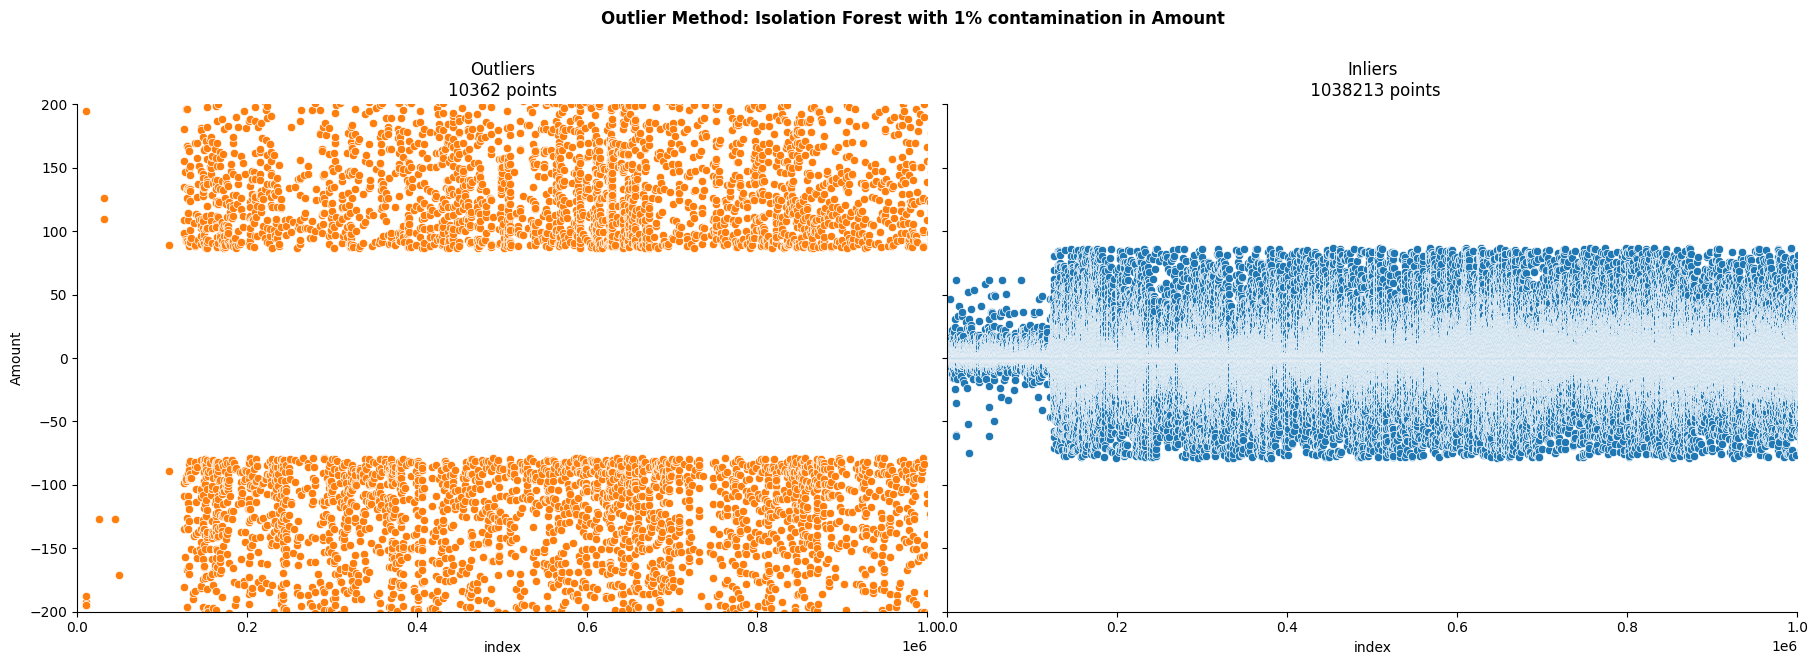

In [16]:
outlier_plot(df_0, 'Isolation Forest with 1% contamination in Amount', 'index', 'Amount', 'anomaly', [0, 1000000], [-200, 200]);

In [17]:
model2=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.001), max_features=1.0, n_jobs=10) #
model2.fit(df_0[['Amount']])

df_0['anomaly_scores_1pct']=model2.decision_function(df_0[['Amount']])
df_0['anomaly_1pct']=model2.predict(df_0[['Amount']])
df_0.head(20)

/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,index,GL account,Journal,Account No,BAT_NAME,JNL_LNE,Period,SOURCE_USER,POST_USER,Amount,anomaly_scores,anomaly,anomaly_scores_1pct,anomaly_1pct
0,0,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,4,Period 4,SOURCE_USER 61,POST_USER 60,0.480060,0.445153,1,0.525789,1
1,1,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,5,Period 4,SOURCE_USER 61,POST_USER 60,0.788670,0.437916,1,0.515444,1
2,2,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,6,Period 4,SOURCE_USER 61,POST_USER 60,1.080135,0.431272,1,0.509671,1
3,3,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,7,Period 4,SOURCE_USER 61,POST_USER 60,1.097280,0.430570,1,0.508212,1
4,4,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,8,Period 4,SOURCE_USER 61,POST_USER 60,-1.097280,0.423141,1,0.503984,1
5,5,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,10,Period 4,SOURCE_USER 61,POST_USER 60,-1.080135,0.423599,1,0.504678,1
6,6,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,11,Period 4,SOURCE_USER 61,POST_USER 60,-0.788670,0.430985,1,0.511319,1
7,7,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,12,Period 4,SOURCE_USER 61,POST_USER 60,-0.480060,0.437509,1,0.518058,1
8,8,GL account 197,Journal 1,Account No 28386,BAT_NAME 517639,3,Period 12,SOURCE_USER 61,POST_USER 60,0.164421,0.452058,1,0.531926,1
9,9,GL account 197,Journal 1,Account No 28386,BAT_NAME 517639,4,Period 12,SOURCE_USER 61,POST_USER 60,-0.164421,0.446975,1,0.529661,1


Outlier Method: Isolation Forest with 0.1% contamination in Amount
Number of anomalous values 1030
Number of non anomalous values  1047545
Total Number of Values: 1048575


/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


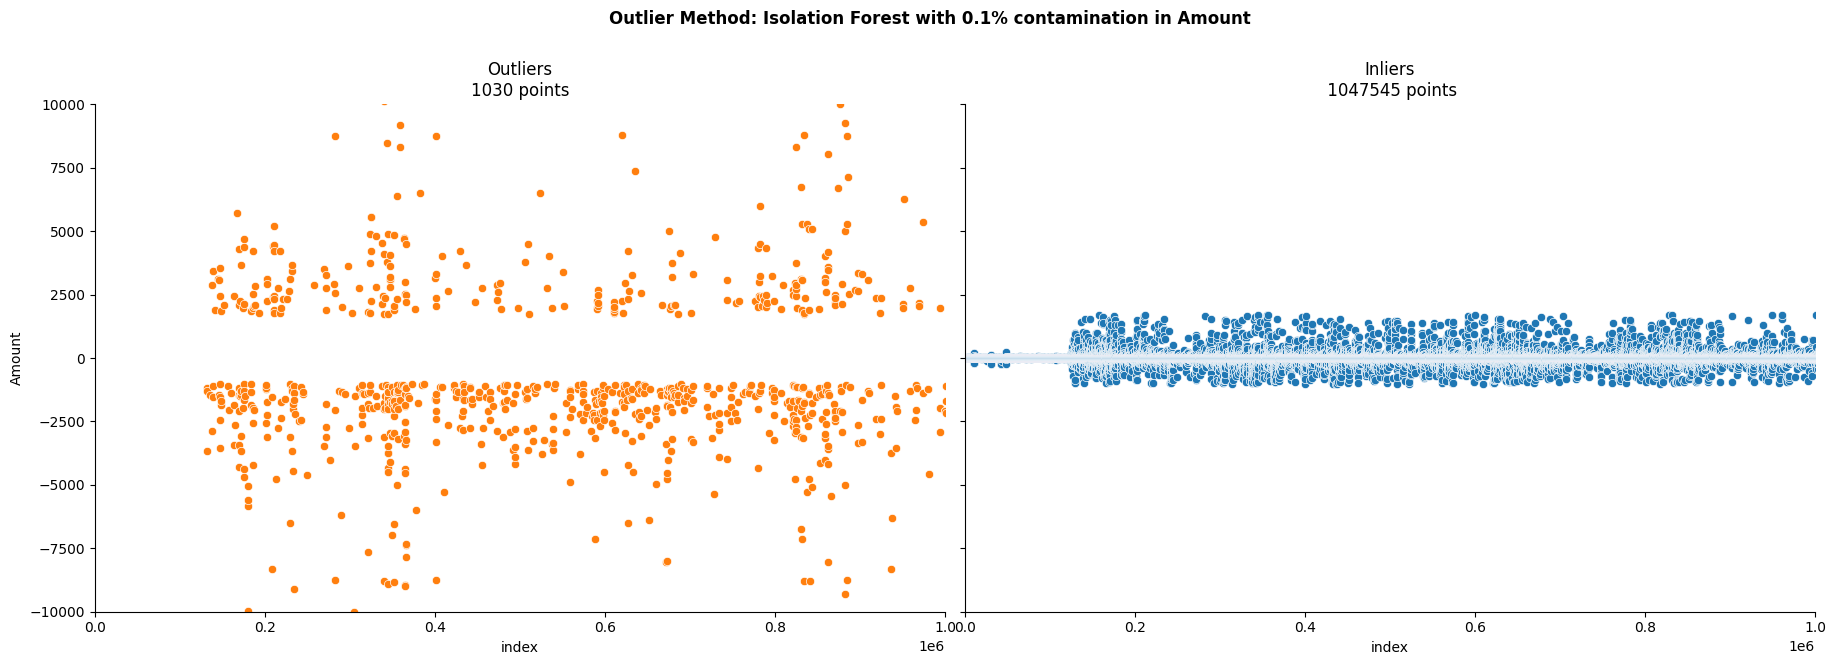

In [18]:
outlier_plot(df_0, 'Isolation Forest with 0.1% contamination in Amount', 'index', 'Amount', 'anomaly_1pct', [0, 1000000], [-10000, 10000]);

In [19]:
df_0['Period'].unique()

array(['Period 4', 'Period 12', 'Period 1', 'Period 11', 'Period 2',
       'Period 3', 'Period 8', 'Period 7', 'Period 9', 'Period 10',
       'Period 5', 'Period 6', 'Period 13'], dtype=object)

In [20]:
print('number of unique POST_USER: ', df_0['POST_USER'].unique().shape[0])
print('number of unique SOURCE_USER: ', df_0['SOURCE_USER'].unique().shape[0])

number of unique POST_USER:  137
number of unique SOURCE_USER:  137


In [21]:
df_0['POST_USER'] = df_0['POST_USER'].astype('category')
df_0['POST_USER_n'] = df_0['POST_USER'].cat.codes
df_0['SOURCE_USER'] = df_0['SOURCE_USER'].astype('category')
df_0['SOURCE_USER_n'] = df_0['SOURCE_USER'].cat.codes
df_0['Period'] = df_0['Period'].astype('category')
df_0['Period_n'] = df_0['Period'].cat.codes



df_0

,index,GL account,Journal,Account No,BAT_NAME,JNL_LNE,Period,SOURCE_USER,POST_USER,Amount,anomaly_scores,anomaly,anomaly_scores_1pct,anomaly_1pct,POST_USER_n,SOURCE_USER_n,Period_n
0,0,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,4,Period 4,SOURCE_USER 61,POST_USER 60,0.480060,0.445153,1,0.525789,1,97,98,7
1,1,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,5,Period 4,SOURCE_USER 61,POST_USER 60,0.788670,0.437916,1,0.515444,1,97,98,7
2,2,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,6,Period 4,SOURCE_USER 61,POST_USER 60,1.080135,0.431272,1,0.509671,1,97,98,7
3,3,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,7,Period 4,SOURCE_USER 61,POST_USER 60,1.097280,0.430570,1,0.508212,1,97,98,7
4,4,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,8,Period 4,SOURCE_USER 61,POST_USER 60,-1.097280,0.423141,1,0.503984,1,97,98,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,GL account 529,Journal 1,Account No 3583,BAT_NAME 838033,13,Period 4,SOURCE_USER 61,POST_USER 60,-11.075327,0.201858,1,0.303994,1,97,98,7
1048571,1048571,GL account 529,Journal 1,Account No 3583,BAT_NAME 838033,14,Period 4,SOURCE_USER 61,POST_USER 60,-19.203943,0.138818,1,0.224580,1,97,98,7
1048572,1048572,GL account 529,Journal 1,Account No 3583,BAT_NAME 838033,15,Period 4,SOURCE_USER 61,POST_USER 60,-26.301116,0.097285,1,0.181696,1,97,98,7
1048573,1048573,GL account 529,Journal 1,Account No 3583,BAT_NAME 838033,16,Period 4,SOURCE_USER 61,POST_USER 60,-46.585091,0.048087,1,0.107760,1,97,98,7


In [22]:
model3=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.001), max_features=1.0, n_jobs=10) #
model3.fit(df_0[['POST_USER_n', 'Amount']])

/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.001, n_estimators=150, n_jobs=10)

In [23]:
df_0['anomaly_scores_PU']=model3.decision_function(df_0[['POST_USER_n', 'Amount']])
df_0['anomaly_PU']=model3.predict(df_0[['POST_USER_n', 'Amount']])
df_0.head(10)

,index,GL account,Journal,Account No,BAT_NAME,JNL_LNE,Period,SOURCE_USER,POST_USER,Amount,anomaly_scores,anomaly,anomaly_scores_1pct,anomaly_1pct,POST_USER_n,SOURCE_USER_n,Period_n,anomaly_scores_PU,anomaly_PU
0,0,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,4,Period 4,SOURCE_USER 61,POST_USER 60,0.480060,0.445153,1,0.525789,1,97,98,7,0.470455,1
1,1,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,5,Period 4,SOURCE_USER 61,POST_USER 60,0.788670,0.437916,1,0.515444,1,97,98,7,0.468574,1
2,2,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,6,Period 4,SOURCE_USER 61,POST_USER 60,1.080135,0.431272,1,0.509671,1,97,98,7,0.464402,1
3,3,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,7,Period 4,SOURCE_USER 61,POST_USER 60,1.097280,0.430570,1,0.508212,1,97,98,7,0.464402,1
4,4,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,8,Period 4,SOURCE_USER 61,POST_USER 60,-1.097280,0.423141,1,0.503984,1,97,98,7,0.458897,1
5,5,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,10,Period 4,SOURCE_USER 61,POST_USER 60,-1.080135,0.423599,1,0.504678,1,97,98,7,0.459462,1
6,6,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,11,Period 4,SOURCE_USER 61,POST_USER 60,-0.788670,0.430985,1,0.511319,1,97,98,7,0.461797,1
7,7,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,12,Period 4,SOURCE_USER 61,POST_USER 60,-0.480060,0.437509,1,0.518058,1,97,98,7,0.465341,1
8,8,GL account 197,Journal 1,Account No 28386,BAT_NAME 517639,3,Period 12,SOURCE_USER 61,POST_USER 60,0.164421,0.452058,1,0.531926,1,97,98,3,0.473235,1
9,9,GL account 197,Journal 1,Account No 28386,BAT_NAME 517639,4,Period 12,SOURCE_USER 61,POST_USER 60,-0.164421,0.446975,1,0.529661,1,97,98,3,0.471346,1


In [24]:
outliers_counter = len(df_0[df_0['POST_USER_n'] > 100])
print("Accuracy percentage:", list(df_0['anomaly_PU']).count(-1)) #/(outliers_counter)

Accuracy percentage: 1040


Outlier Method: Isolation Forest with 0.1% contamination in Amount vs POST_USER
Number of anomalous values 1040
Number of non anomalous values  1047535
Total Number of Values: 1048575


/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


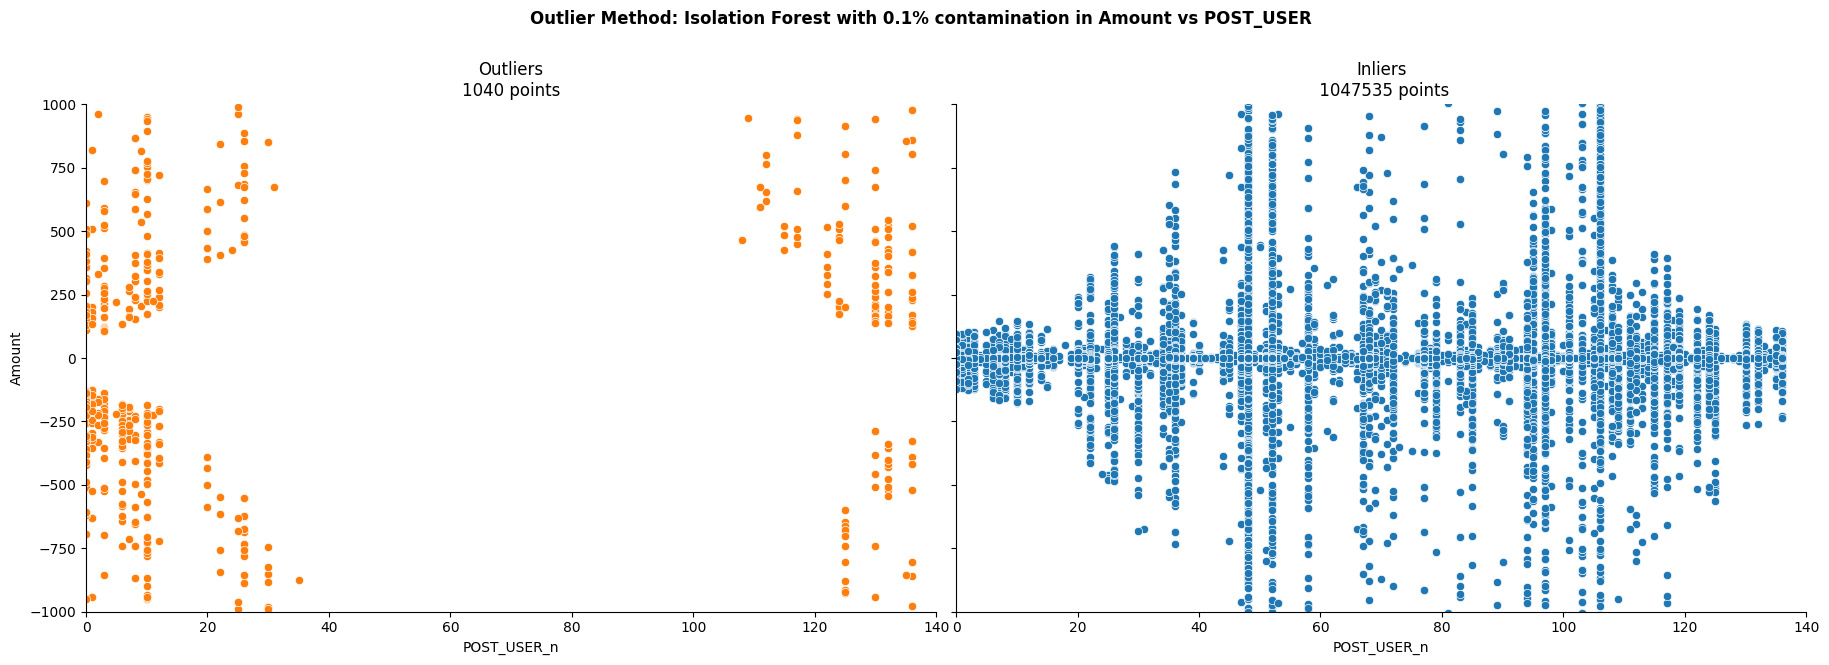

In [25]:
outlier_plot(df_0, 'Isolation Forest with 0.1% contamination in Amount vs POST_USER', 'POST_USER_n', 'Amount', 'anomaly_PU', [0, 140], [-1000, 1000]);

In [26]:
model4=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.001), max_features=1.0, n_jobs=10) #
model4.fit(df_0[['POST_USER_n', 'SOURCE_USER_n', 'Amount']])

/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.001, n_estimators=150, n_jobs=10)

In [27]:
df_0['anomaly_scores_PUSU']=model4.decision_function(df_0[['POST_USER_n', 'SOURCE_USER_n', 'Amount']])
df_0['anomaly_PUSU']=model4.predict(df_0[['POST_USER_n', 'SOURCE_USER_n', 'Amount']])
df_0.head()

,index,GL account,Journal,Account No,BAT_NAME,JNL_LNE,Period,SOURCE_USER,POST_USER,Amount,...,anomaly,anomaly_scores_1pct,anomaly_1pct,POST_USER_n,SOURCE_USER_n,Period_n,anomaly_scores_PU,anomaly_PU,anomaly_scores_PUSU,anomaly_PUSU
0,0,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,4,Period 4,SOURCE_USER 61,POST_USER 60,0.480060,...,1,0.525789,1,97,98,7,0.470455,1,0.458552,1
1,1,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,5,Period 4,SOURCE_USER 61,POST_USER 60,0.788670,...,1,0.515444,1,97,98,7,0.468574,1,0.456450,1
2,2,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,6,Period 4,SOURCE_USER 61,POST_USER 60,1.080135,...,1,0.509671,1,97,98,7,0.464402,1,0.453786,1
3,3,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,7,Period 4,SOURCE_USER 61,POST_USER 60,1.097280,...,1,0.508212,1,97,98,7,0.464402,1,0.453786,1
4,4,GL account 197,Journal 1,Account No 28386,BAT_NAME 166002,8,Period 4,SOURCE_USER 61,POST_USER 60,-1.097280,...,1,0.503984,1,97,98,7,0.458897,1,0.448643,1


Outlier Method: Isolation Forest with 0.1% contamination in Amount vs POST_USER & SOURCS_USER
Number of anomalous values 1043
Number of non anomalous values  1047532
Total Number of Values: 1048575


/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


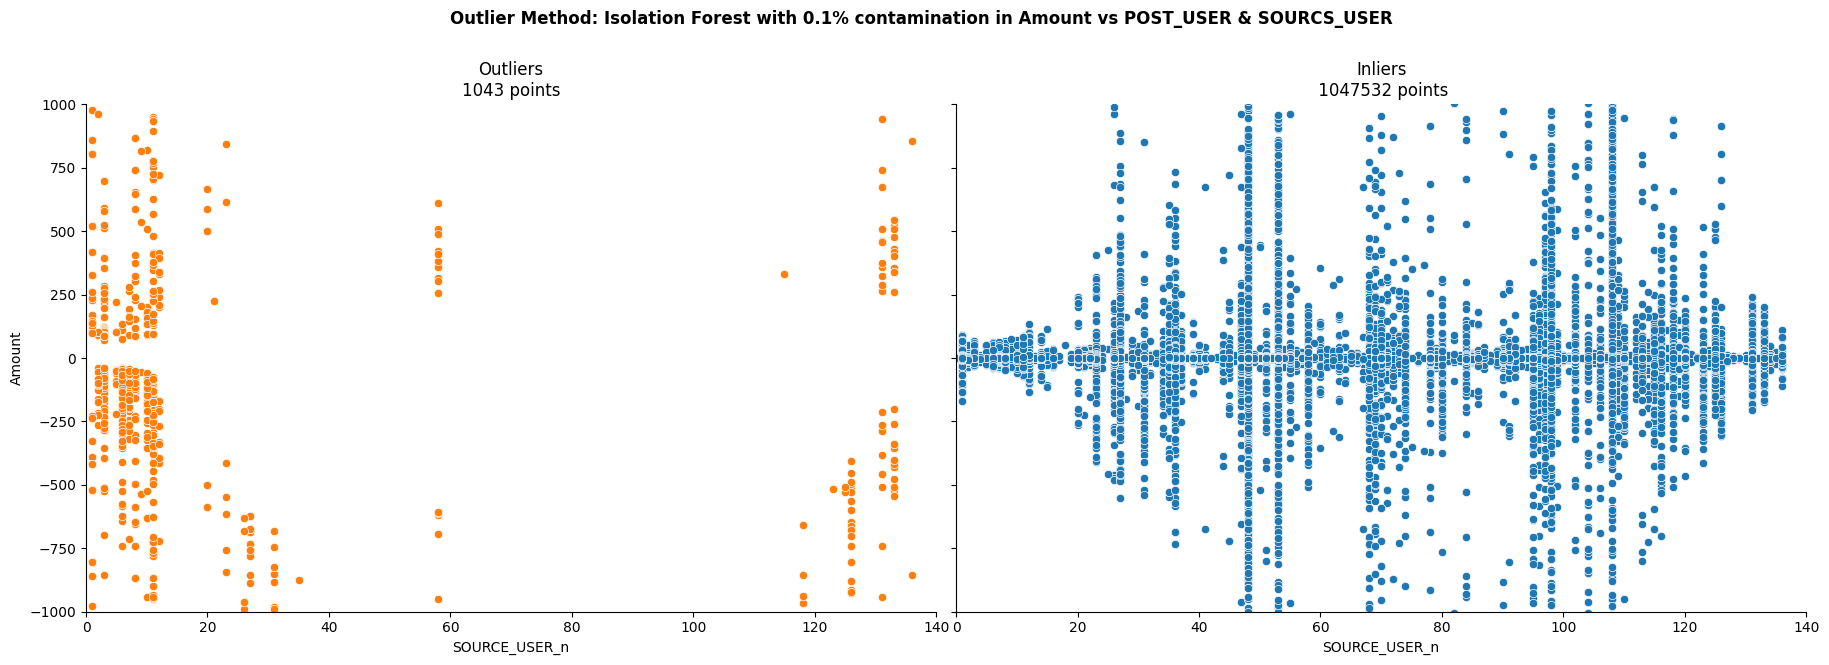

In [28]:
outlier_plot(df_0, 'Isolation Forest with 0.1% contamination in Amount vs POST_USER & SOURCS_USER', 'SOURCE_USER_n', 'Amount', 'anomaly_PUSU', [0, 140], [-1000, 1000]);

In [29]:
model5=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.001), max_features=1.0, n_jobs=10) #
model5.fit(df_0[['POST_USER_n', 'SOURCE_USER_n', 'Period_n', 'Amount']])
df_0['anomaly_scores_PUSUP']=model5.decision_function(df_0[['POST_USER_n', 'SOURCE_USER_n', 'Period_n', 'Amount']])
df_0['anomaly_PUSUP']=model5.predict(df_0[['POST_USER_n', 'SOURCE_USER_n', 'Period_n', 'Amount']])



/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest with 0.1% contamination in Amount vs Period
Number of anomalous values 1049
Number of non anomalous values  1047526
Total Number of Values: 1048575


/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/adminux0/anaconda3/envs/tmp_proj/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


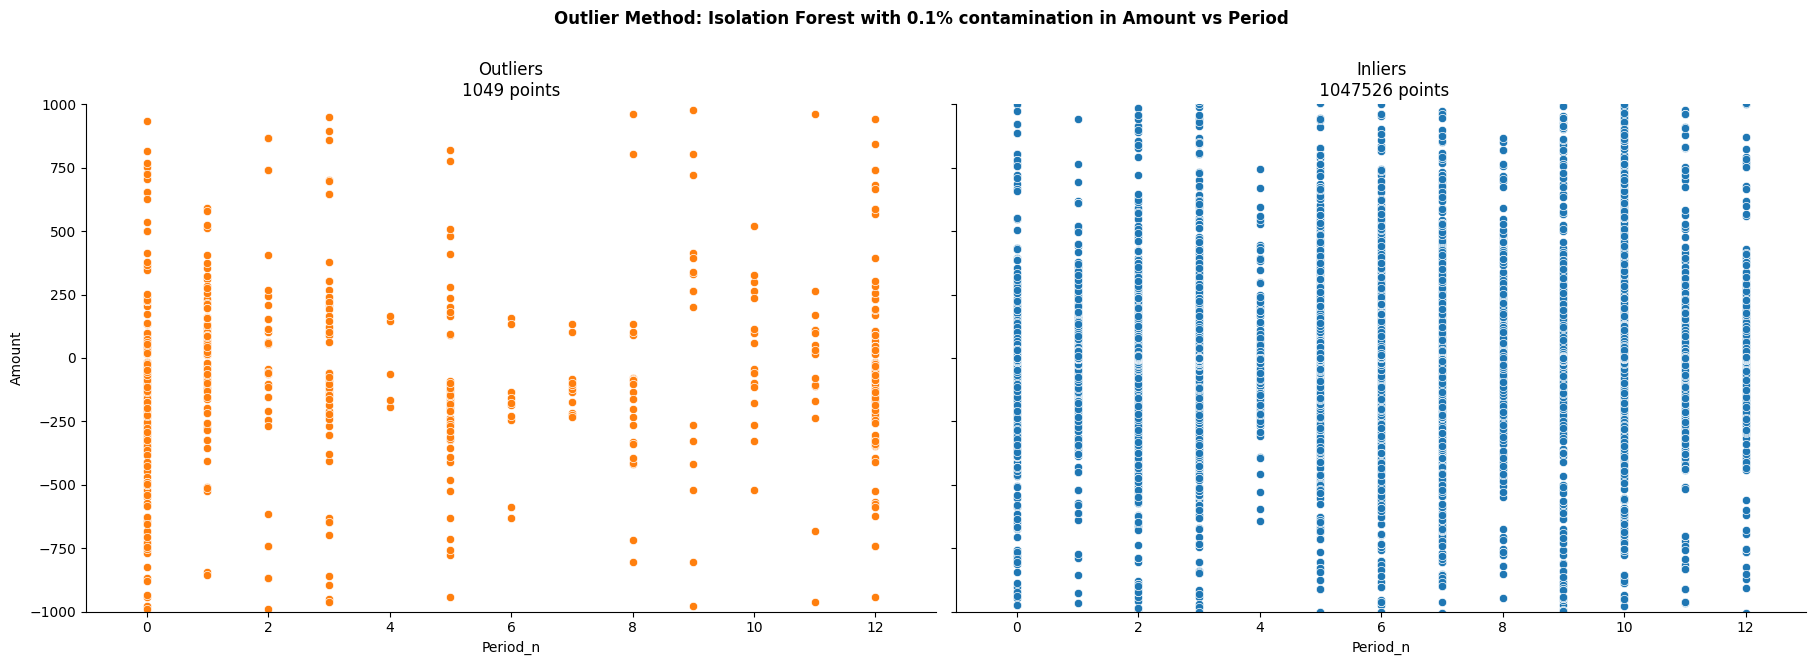

In [30]:
outlier_plot(df_0, 'Isolation Forest with 0.1% contamination in Amount vs Period', 'Period_n', 'Amount', 'anomaly_PUSUP', [-1, 13], [-1000, 1000]);

### Graph of multi-factor detection

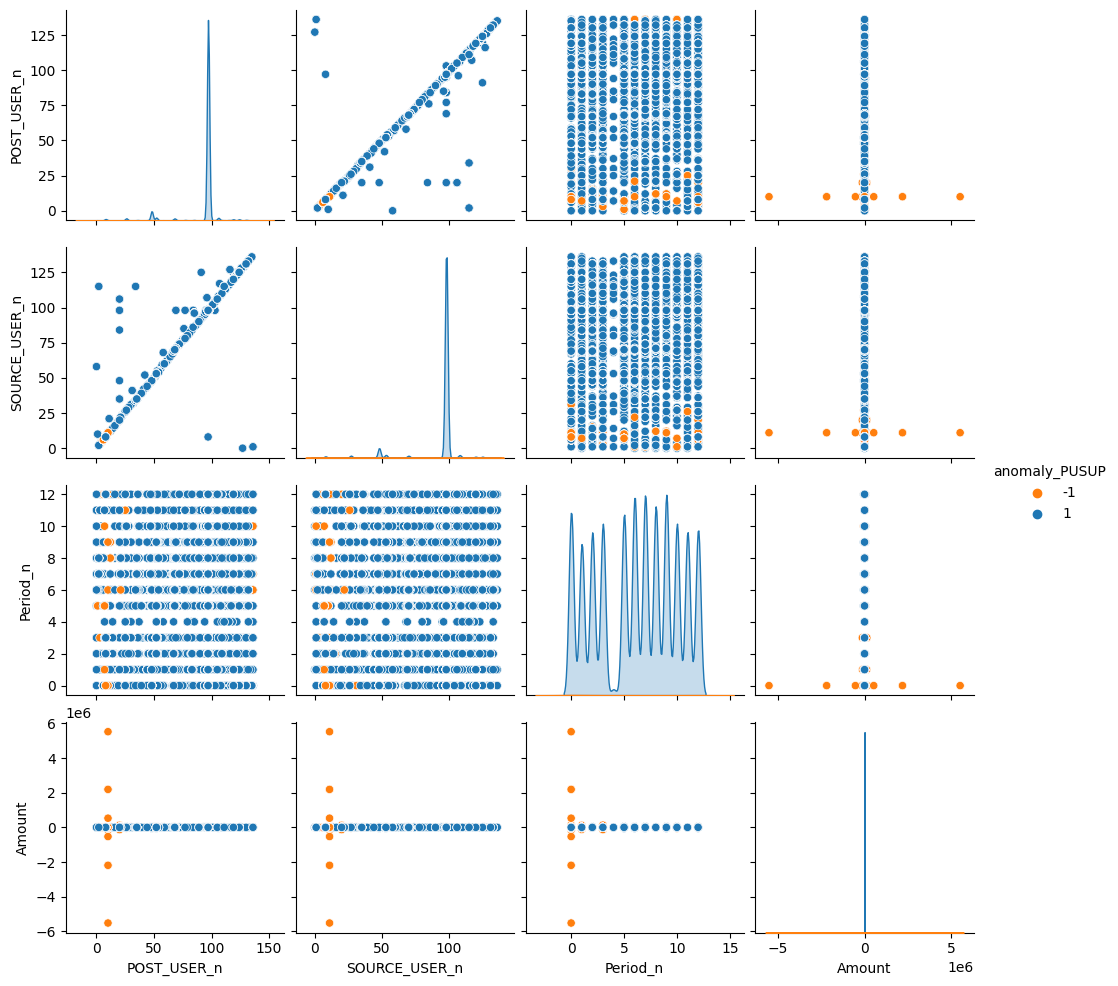

In [31]:
palette = ['#ff7f0e', '#1f77b4']
anomaly_inputs = ['POST_USER_n', 'SOURCE_USER_n', 'Period_n', 'Amount']
sns.pairplot(df_0, vars=anomaly_inputs, hue='anomaly_PUSUP', palette=palette)

### End